In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()


In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df['target']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df0=df[:50]
df1=df[50:100]
df2=df[100:]

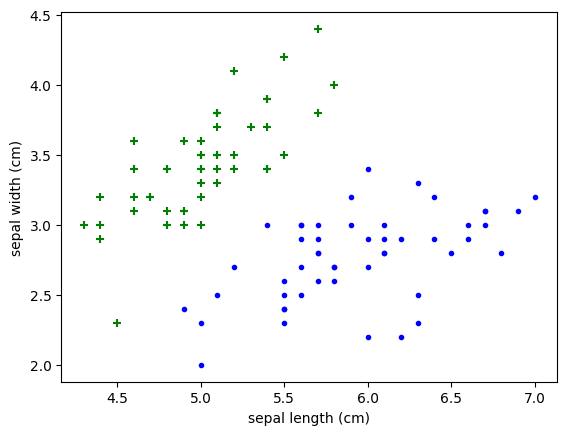

In [ ]:
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color='green',marker='+')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='blue',marker='.')

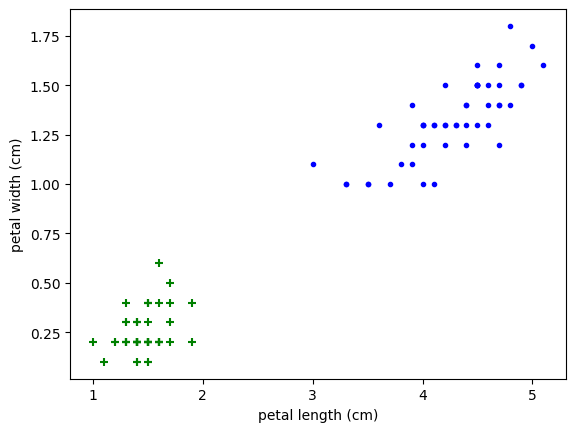

In [ ]:
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color='green',marker='+')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='blue',marker='.')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=df.drop(['target'],axis='columns')
y=df.target

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
len(X_train)

120

In [ ]:
len(X_test)

30

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=10)

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
knn.score(X_test,y_test)

0.9666666666666667

In [ ]:
from sklearn.metrics import confusion_matrix
y_predicted=knn.predict(X_test)
cm=confusion_matrix(y_test,y_predicted)
cm

array([[ 9,  0,  0],
       [ 0, 13,  0],
       [ 0,  1,  7]])

Text(95.72222222222221, 0.5, 'Truth')

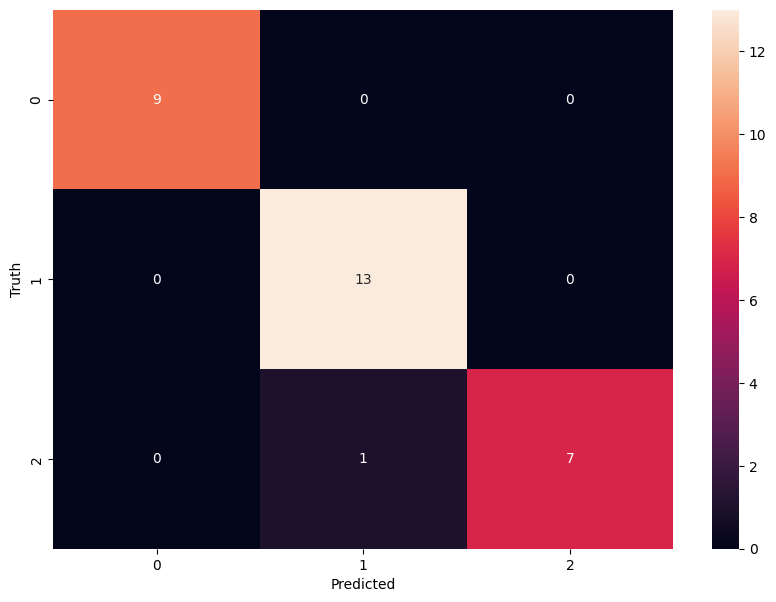

In [ ]:
%matplotlib inline
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.93      1.00      0.96        13
           2       1.00      0.88      0.93         8

    accuracy                           0.97        30
   macro avg       0.98      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30

